#### Categorical scatterplots:

- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

#### Categorical distribution plots:

- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

#### Categorical estimate plots:

- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)

## Categorical Scatterplots

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


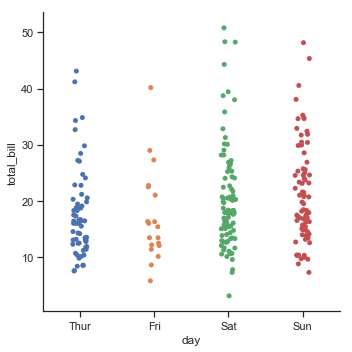

In [3]:
sns.catplot(x='day', y='total_bill', data=tips)

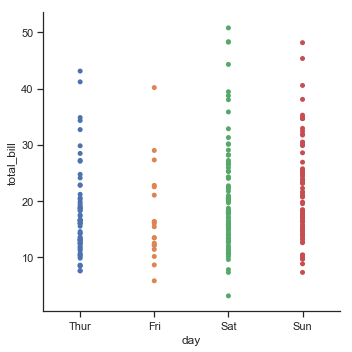

In [4]:
# jitter parameter controls magnitude of jitter or disables ot altogether
sns.catplot(x='day', y='total_bill', jitter=False, data=tips)

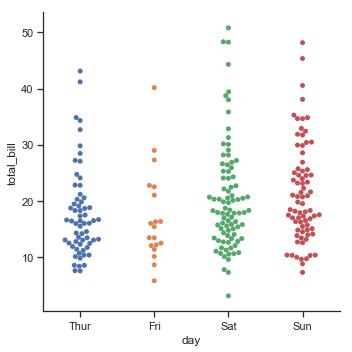

In [5]:
# prevents them from overlapping.
sns.catplot(x='day', y='total_bill', kind='swarm', data=tips)

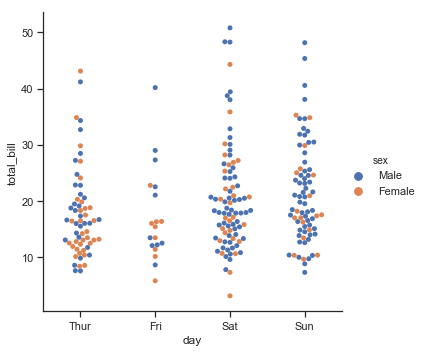

In [6]:
# making it higher dimensional
sns.catplot(x='day', y='total_bill', hue='sex', kind='swarm', data=tips)

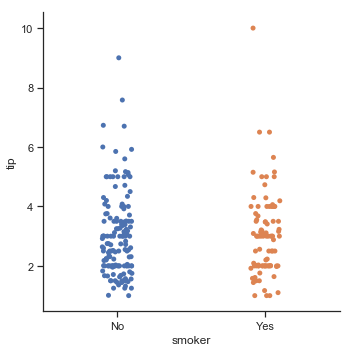

In [7]:
# order parameter
sns.catplot(x='smoker', y='tip', order=['No', 'Yes'], data=tips)

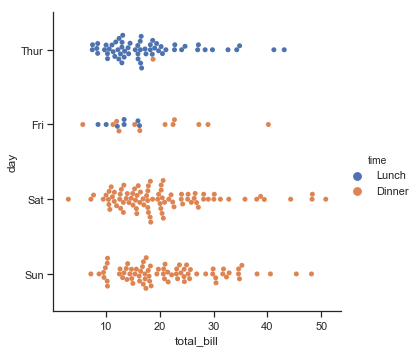

In [8]:
# putting categorical variables on y axis
sns.catplot(x='total_bill', y='day', hue='time', kind='swarm', data=tips)

## Distributions of observations within categories

### Boxplots

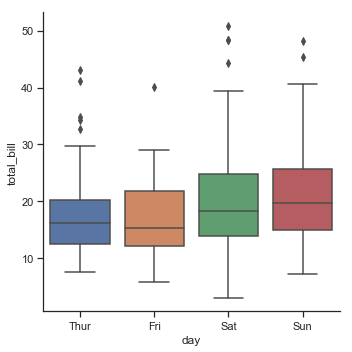

In [9]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips)

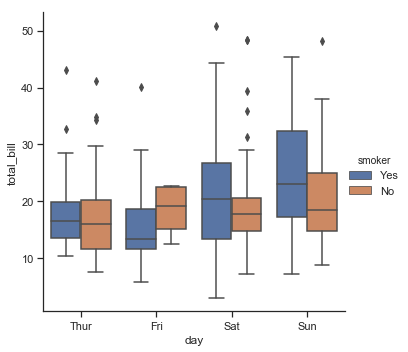

In [10]:
# hue paramtere
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=tips)

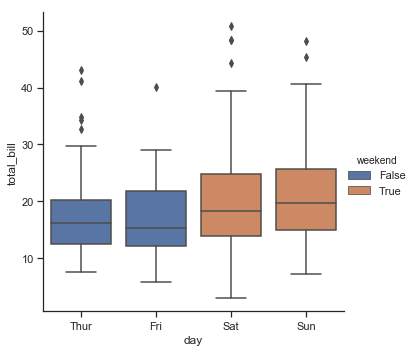

In [11]:
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])
sns.catplot(x='day', y='total_bill', hue='weekend',
           kind='box', dodge=False, data=tips)

In [13]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


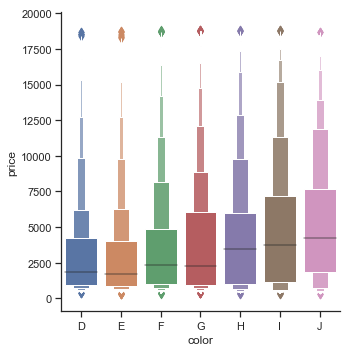

In [14]:
sns.catplot(x='color', y='price', kind='boxen',
           data=diamonds.sort_values('color'))

### Violinplots

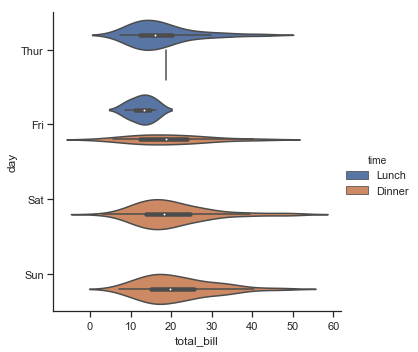

In [15]:
sns.catplot(x='total_bill', y='day', hue='time', kind='violin', data=tips)

## Statistical estimation within categories

In [16]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Bar Plots

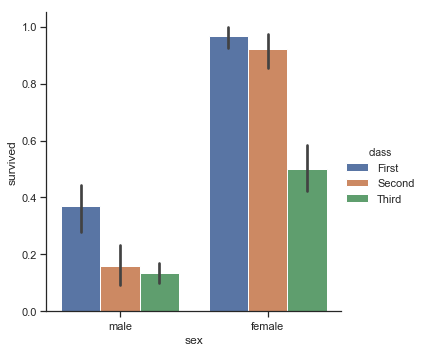

In [17]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)

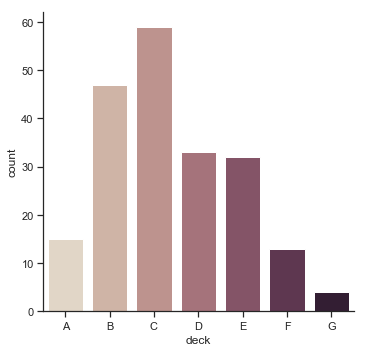

In [18]:
sns.catplot(x='deck', kind='count', palette='ch:.25', data=titanic)

### Point plots

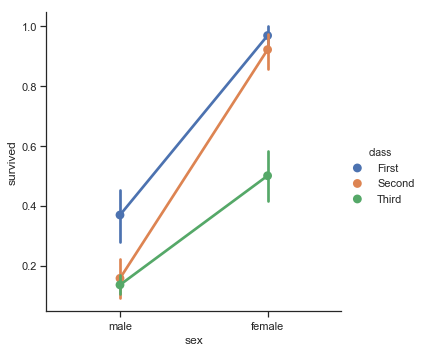

In [19]:
sns.catplot(x='sex', y='survived', hue='class', kind='point', data=titanic)

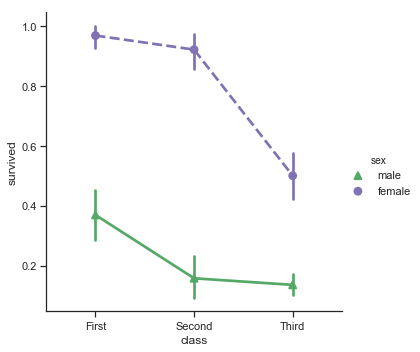

In [20]:
sns.catplot(x='class', y='survived', hue='sex',
           palette={"male":"g", "female": "m"},
           markers=["^", "o"], linestyles=["-", "--"],
           kind='point', data=titanic)

## Plotting "wide-form" data

In [21]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


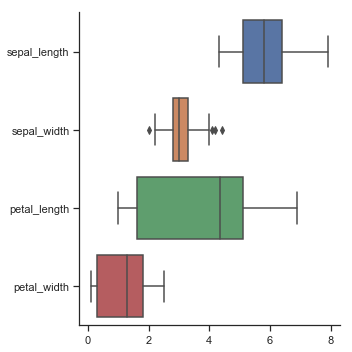

In [23]:
sns.catplot(data=iris, orient='h', kind='box')

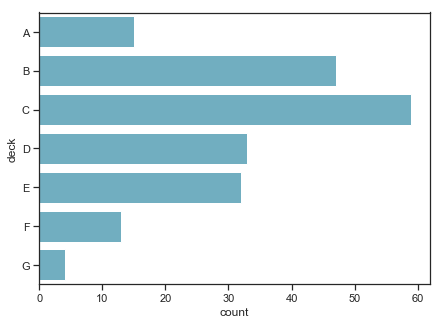

In [26]:
# controlling size and shape of points
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y='deck', data=titanic, color='c')

## Showing multiple relationships with facets

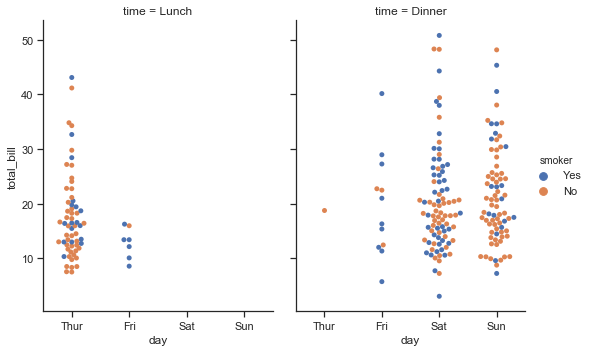

In [30]:
sns.catplot(x='day', y='total_bill', hue='smoker',
           col='time', aspect=0.75,
           kind='swarm', data=tips)